# DebugRL Tutorial

In this tutorial, we will see how to use debug_rl through ``GridCraft`` and ``Pendulum`` environments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from debug_rl.envs.gridcraft import GridEnv, spec_from_string, plot_grid_values
import debug_rl.envs.pendulum as pd
import debug_rl.envs.mountaincar as mc
from debug_rl.solvers import OracleViSolver, OracleCviSolver, SamplingFittedViSolver

# Gridcraft examples

In [2]:
# make a environment
maze = spec_from_string("SOOO\\"+
                        "OLLL\\"+
                        "OOOO\\"+
                        "OLRO\\")
T = 50
env = GridEnv(maze, trans_eps=0.0, horizon=T)

In [3]:
# Do Value Iteration
solver = OracleViSolver(env)
solver.run()
values = solver.values  # SxA
policy = solver.compute_policy(values)  # SxA
visitation = env.compute_visitation(policy)  # SxA

/home/dl-box/debugRL-release/debug_rl/solvers/base.py:140: UserWarning: The option "record_all_array" is False and the record_array function only record the lastly recorded array
  warnings.warn(
 23%|██▎       | 2322/10000 [00:00<00:00, 11243.36it/s]

OracleViSolver solve_options:
{   'discount': 0.99,
    'er_coef': 0.2,
    'kl_coef': 0.1,
    'max_operator': 'mellow_max',
    'record_all_array': False,
    'record_performance_interval': 100,
    'seed': 0}


100%|██████████| 10000/10000 [00:00<00:00, 11940.93it/s]


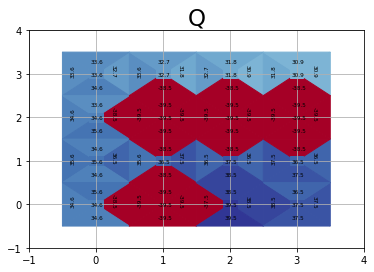

In [4]:
# plot q values 
plot_grid_values(env.gs, env.compute_action_values(policy), title="Q")

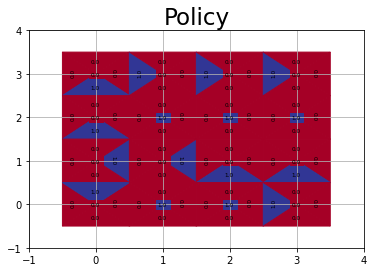

In [5]:
# plot policy
plot_grid_values(env.gs, policy, title="Policy")

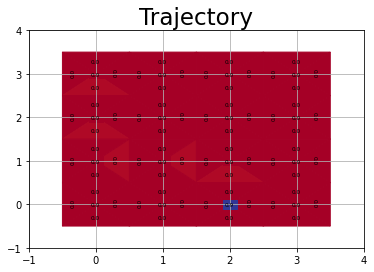

In [6]:
# plot state visitation frequency
plot_grid_values(env.gs, np.sum(visitation, axis=0), title="Trajectory")

In [7]:
# Do Conservative Value Iteration
solver = OracleCviSolver(env)
solver.initialize()
solver.run()
values = solver.values  # SxA
policy = solver.compute_policy(values)  # SxA
visitation = env.compute_visitation(policy)  # SxA

 15%|█▌        | 1544/10000 [00:00<00:01, 7732.19it/s]

OracleCviSolver solve_options:
{   'discount': 0.99,
    'er_coef': 0.2,
    'kl_coef': 0.1,
    'max_operator': 'mellow_max',
    'record_all_array': False,
    'record_performance_interval': 100,
    'seed': 0}
OracleCviSolver solve_options:
{   'discount': 0.99,
    'er_coef': 0.2,
    'kl_coef': 0.1,
    'max_operator': 'mellow_max',
    'record_all_array': False,
    'record_performance_interval': 100,
    'seed': 0}


100%|██████████| 10000/10000 [00:01<00:00, 8187.92it/s]


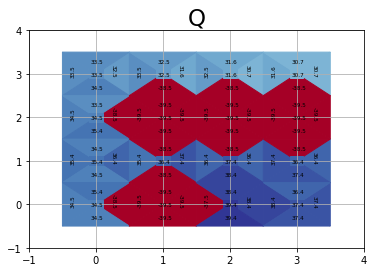

In [8]:
# plot q values
plot_grid_values(env.gs, env.compute_action_values(policy), title="Q")

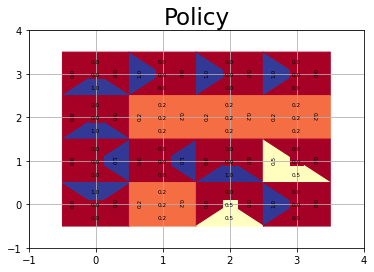

In [9]:
# plot policy 
plot_grid_values(env.gs, policy, title="Policy")

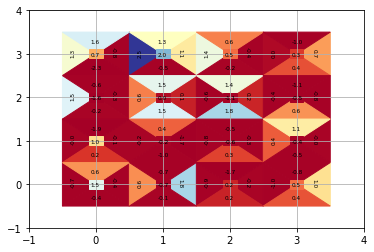

In [10]:
# You can plot any matrix with its shape of SxA
random_values = np.random.randn(*values.shape)
plot_grid_values(env.gs, random_values)

In [11]:
# The plot_grid_values function can return the image as a np.array.
# This is useful for tensorboard.add_image.

image_array = plot_grid_values(env.gs, random_values, return_image=True)
print(image_array.shape)

(3, 288, 432)


# Pendulum

In [12]:
env = pd.Pendulum()

/home/dl-box/anaconda3/envs/debugrl-release/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [13]:
solver = SamplingFittedViSolver(env)
solver.run(3000)
values = solver.values
policy = solver.compute_policy(values)
visitation = env.compute_visitation(policy)

SamplingFittedViSolver solve_options:
{   'activation': 'relu',
    'buffer_size': 1000000.0,
    'clip_grad': False,
    'critic_loss': 'mse',
    'depth': 2,
    'device': 'cuda',
    'discount': 0.99,
    'eps_decay': 200,
    'eps_end': 0.05,
    'eps_start': 0.9,
    'er_coef': 0.2,
    'hidden': 128,
    'kl_coef': 0.1,
    'lr': 0.001,
    'max_operator': 'mellow_max',
    'minibatch_size': 32,
    'num_samples': 4,
    'optimizer': 'Adam',
    'record_all_array': False,
    'record_performance_interval': 100,
    'seed': 0,
    'target_update_interval': 100}


100%|██████████| 3000/3000 [00:09<00:00, 308.77it/s]


<ipython-input-14-f1ba53cfde7c>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


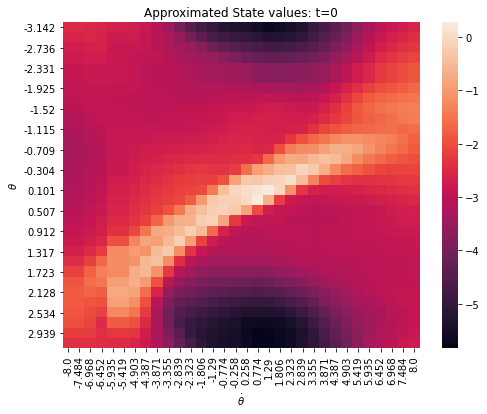

In [14]:
# plot the approximated state values
v_values = np.max(values, axis=-1)
vmin = v_values.min()
vmax = v_values.max()
v_values = pd.reshape_values(env, v_values)
pd.plot_pendulum_values(env, v_values, vmin=vmin, vmax=vmax, title="Approximated State values: t=0")
plt.show()

<ipython-input-15-6fb5083477d0>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


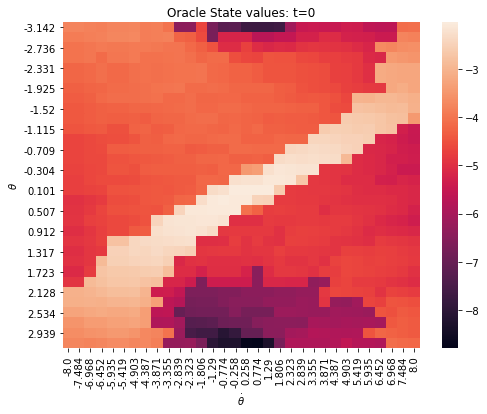

In [15]:
# plot the oracle state values

values = env.compute_action_values(policy)
v_values = np.max(values, axis=-1)
vmin = v_values.min()
vmax = v_values.max()
v_values = pd.reshape_values(env, v_values)
pd.plot_pendulum_values(env, v_values, vmin=vmin, vmax=vmax, title="Oracle State values: t=0")
plt.show()

# MountainCar

In [16]:
env = mc.MountainCar()

In [17]:
solver = SamplingFittedViSolver(env)
solver.run(3000)
values = solver.values
policy = solver.compute_policy(values)
visitation = env.compute_visitation(policy)

  0%|          | 0/3000 [00:00<?, ?it/s]

SamplingFittedViSolver solve_options:
{   'activation': 'relu',
    'buffer_size': 1000000.0,
    'clip_grad': False,
    'critic_loss': 'mse',
    'depth': 2,
    'device': 'cuda',
    'discount': 0.99,
    'eps_decay': 200,
    'eps_end': 0.05,
    'eps_start': 0.9,
    'er_coef': 0.2,
    'hidden': 128,
    'kl_coef': 0.1,
    'lr': 0.001,
    'max_operator': 'mellow_max',
    'minibatch_size': 32,
    'num_samples': 4,
    'optimizer': 'Adam',
    'record_all_array': False,
    'record_performance_interval': 100,
    'seed': 0,
    'target_update_interval': 100}


100%|██████████| 3000/3000 [00:11<00:00, 269.53it/s]


<ipython-input-18-3566a6e30bc8>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


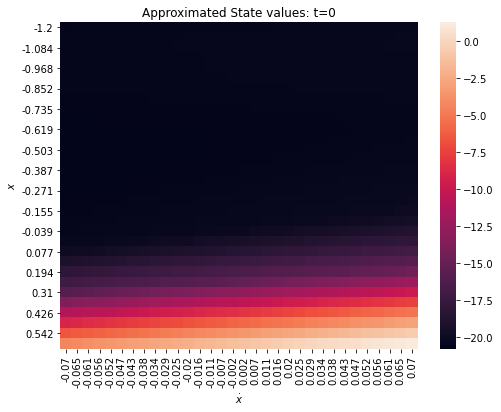

In [18]:
# plot the approximated state values
v_values = np.max(values, axis=-1)
vmin = v_values.min()
vmax = v_values.max()
v_values = mc.reshape_values(env, v_values)
mc.plot_mountaincar_values(env, v_values, vmin=vmin, vmax=vmax, title="Approximated State values: t=0")
plt.show()

<ipython-input-19-8a9efda8e2aa>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


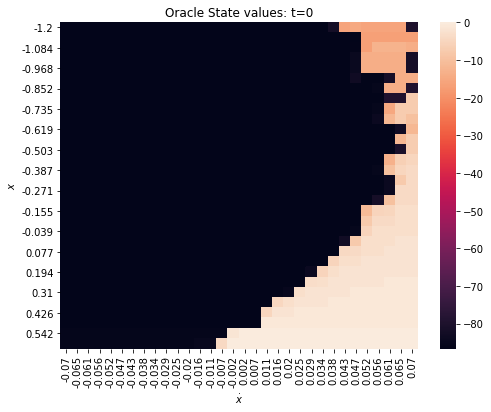

In [19]:
# plot the oracle state values

values = env.compute_action_values(policy)
v_values = np.max(values, axis=-1)
vmin = v_values.min()
vmax = v_values.max()
v_values = mc.reshape_values(env, v_values)
mc.plot_mountaincar_values(env, v_values, vmin=vmin, vmax=vmax, title="Oracle State values: t=0")
plt.show()

# Plot Learning Curve

You can record the scalar values with ``record_scalar`` function (See [debug_rl/solvers/base.py](../debug_rl/solvers/base.py)).
All recorded scalars are stored in ``history`` dictionary.

Text(0.5, 1.0, 'Performance')

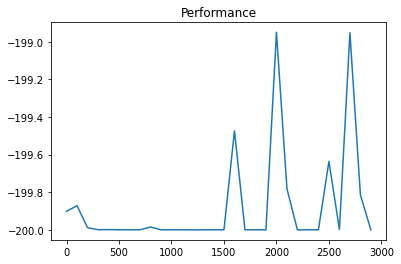

In [22]:
performance = solver.history["ReturnPolicy"]
plt.plot(performance["x"], performance["y"])
plt.title("Performance")

Text(0.5, 1.0, 'Q MSE')

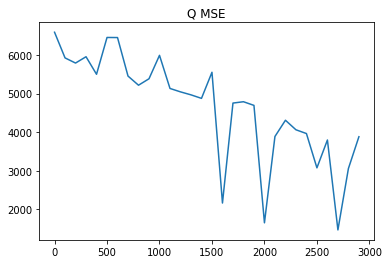

In [23]:
q_error = solver.history["QError"]
plt.plot(q_error["x"], q_error["y"])
plt.title("Q MSE")

# Visualization with clearML

Moreover, you can view the recorded scalars using [clearML](https://github.com/allegroai/clearml).
All you need to do is just pass the ``logger`` object at initialization.

![](clearML.png)

In [18]:
from clearml import Task

In [19]:
task = Task.init(project_name="Example", task_name="example")
logger = task.get_logger()

TRAINS Task: overwriting (reusing) task id=98b520480c3b43d199c614dda6e75647
TRAINS results page: http://localhost:8080/projects/d3d5db342d144daeae4ab6b4daf54874/experiments/98b520480c3b43d199c614dda6e75647/output/log
======> WARNING! UNCOMMITTED CHANGES IN REPOSITORY git@github.com:syuntoku14/debugRL.git <======


In [ ]:
solver = SamplingFittedViSolver(env, logger=logger)
values = solver.run(3000)